# Using the IMOS User Code Library with Python

In [23]:
from IPython.core.display import HTML
HTML('<iframe width="760" height="450" src="https://www.youtube.com/embed/7yTpv70gkGE?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

<div class="alert alert-block alert-info">This document intends to present how to load IMOS NetCDF data into a Python environment, and offers some suggestions about how to use the data once loaded. All the examples below will use the netCDF4 Python module (http://code.google.com/p/netcdf4-python/)

The examples provided in this document only represent a tiny bit of the content of most of the NetCDF files. There are usually many more variables available in a NetCDF file, and therefore many other ways to display data.</div>
***

**Content:**
- [Installation of the IMOS User Code Library (Python) and required packages](#install-imos)
- [Finding an IMOS NetCDF file](#netcdf-imos)
- [General Features of the netCDF4 module](#netcdf4)
- [Output structure](#output)
- [Discover Metadata](#metadata)
- [Discover Variables](#variables)
- [Export the salinity variable](#salinity)
- [Plotting the Salinity-Temperature relationship](#plotting)

***

A list of interesting IMOS based Python library functions is available from their [Github website](https://github.com/aodn/imos-user-code-library/wiki/Using-the-IMOS-User-Code-Library-with-Python#12-finding-an-imos-netcdf-file)

## <a name="install-imos"></a>  Installation of the IMOS User Code Library (Python) and required packages

The examples that will be used rely on the following Python packages, which need to be installed:

+ **numpy** – standard package for scientific computing in Python, provides versatile numerical array objects (http://www.numpy.org/).
+ **matplotlib** – for plotting (http://matplotlib.org/).
+ **netCDF4** – for accessing netCDF files (http://code.google.com/p/netcdf4-python/, follow the Documentation link for installation instructions).

The examples that will be use in this course have been tested in Python 2.7.3, with numpy 1.6.1, matplotlib 1.1.1, and version 1.0.2 of netCDF4. Later versions of these packages will usually work. Earlier versions may work also.

## <a name="netcdf-imos"></a>  Finding an IMOS NetCDF File

In order to find a dataset you are interested in, please refer to the portal help: http://help.aodn.org.au/help/?q=node/6. This is a how-to guide that can help users find an IMOS NetCDF file. When downloading your chosen dataset from the portal, choose one of the download options “List of URLs”, or “All source NETCDF files” to obtain netCDF files.

For users who are already familiar with IMOS facilities and datasets, IMOS NetCDF files are also directly accessible via an OPeNDAP catalog at : http://thredds.aodn.org.au/thredds/catalog/IMOS/catalog.html

Most of the examples in the following sections use the ‘Data URL’ of a dataset. If you have downloaded your dataset from the portal, the data URL is the file path to the file on your local machine. If you are using the THREDDS catelog, the file does not have to be downloaded to your local machine first – the OPeNDAP data URL can be parsed into Python. The OPeNDAP data URL is found on the ‘OPeNDAP Dataset Access Form’ page (see http://help.aodn.org.au/help/?q=node/11), inside the box labelled ‘Data URL’ just above the ‘Global Attributes’ field.

Note: the list of URL’s generated by the IMOS portal when choosing that download option can be converted to a list of OPeNDAP data URL’s by replacing string http://data.aodn.org.au/IMOS/opendap with http://thredds.aodn.org.au/thredds/dodsC/IMOS.

## <a name="netcdf4"></a>  General Features of the netCDF4 module

The first step consists of opening a NetCDF file, whether this file is available locally or remotely on an OPeNDAP server.

Type in your Python command window (or script):

```python
from netCDF4  import Dataset

aatams_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/AATAMS/marine_mammal_ctd-tag/2009_2011_ct64_Casey_Macquarie/ct64-M746-09/IMOS_AATAMS-SATTAG_TSP_20100205T043000Z_ct64-M746-09_END-20101029T071000Z_FV00.nc'
aatams_DATA = Dataset(aatams_URL)
```
This creates a netCDF Dataset object, through which you can access all the contents of the file.

Let's do it below - as this is a Python commands we will be using a `code` cell this time and not a `markdown` (text) one.

In [1]:
from netCDF4  import Dataset

aatams_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/AATAMS/marine_mammal_ctd-tag/2009_2011_ct64_Casey_Macquarie/ct64-M746-09/IMOS_AATAMS-SATTAG_TSP_20100205T043000Z_ct64-M746-09_END-20101029T071000Z_FV00.nc'
aatams_DATA = Dataset(aatams_URL)

## <a name="output"></a>  Output structure

Please refer to the netCDF4 module documentation for a complete description of the Dataset object:: 'http://netcdf4-python.googlecode.com/svn/trunk/docs/netCDF4.Dataset-class.html' (or type help(Dataset) at the Python prompt).

In [2]:
help(aatams_DATA)

Help on Dataset object:

class Dataset(__builtin__.object)
 |  A netCDF `netCDF4.Dataset` is a collection of dimensions, groups, variables and
 |  attributes. Together they describe the meaning of data and relations among
 |  data fields stored in a netCDF file. See `netCDF4.Dataset.__init__` for more
 |  details.
 |  
 |  A list of attribute names corresponding to global netCDF attributes
 |  defined for the `netCDF4.Dataset` can be obtained with the
 |  `netCDF4.Dataset.ncattrs` method.
 |  These attributes can be created by assigning to an attribute of the
 |  `netCDF4.Dataset` instance. A dictionary containing all the netCDF attribute
 |  name/value pairs is provided by the `__dict__` attribute of a
 |  `netCDF4.Dataset` instance.
 |  
 |  The following class variables are read-only and should not be
 |  modified by the user.
 |  
 |  **`dimensions`**: The `dimensions` dictionary maps the names of
 |  dimensions defined for the `netCDF4.Group` or `netCDF4.Dataset` to instances of t

## <a name="metadata"></a> Discover Metadata

In order to see all the global attributes and some other information about the file, type in your command window:

```python
print aatams_DATA
```

The output will look something like this:

```python
 root group (NETCDF3_64BIT file format):
    project: Integrated Marine Observing System (IMOS)
    conventions: IMOS-1.2
    date_created: 2012-09-13T07:27:03Z
    title: Temperature, Salinity and Depth profiles in near real time
    institution: AATAMS
    site: CTD Satellite Relay Data Logger
    abstract: CTD Satellite Relay Data Loggers are used to explore how marine mammal behaviour relates to their oceanic environment. Loggers developped at the University of St Andrews Sea Mammal Research Unit transmit data in near real time via the Argo satellite system
    source: SMRU CTD Satellite relay Data Logger on marine mammals
…
    dimensions: obs, profiles
    variables: TIME, LATITUDE, LONGITUDE, TEMP, PRES, PSAL, parentIndex, TIME_quality_control, LATITUDE_quality_control, LONGITUDE_quality_control, TEMP_quality_control, PRES_quality_control, PSAL_quality_control
    groups:
```

In [3]:
print aatams_DATA

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    project: Integrated Marine Observing System (IMOS)
    conventions: IMOS-1.2
    date_created: 2012-09-13T07:27:03Z
    title: Temperature, Salinity and Depth profiles in near real time
    institution: AATAMS
    site: CTD Satellite Relay Data Logger
    abstract: CTD Satellite Relay Data Loggers are used to explore how marine mammal behaviour relates to their oceanic environment. Loggers developped at the University of St Andrews Sea Mammal Research Unit transmit data in near real time via the Argo satellite system
    source: SMRU CTD Satellite relay Data Logger on marine mammals
    keywords: Oceans>Ocean Temperature>Water Temperature ;Oceans>Salinity/Density>Conductivity ;Oceans>Marine Biology>Marine Mammals
    references: http://imos.org.au/aatams.html
    unique_reference_code: ct64-M746-09
    platform_code: Q9900335
    netcdf_version: 3.6
    naming_authority: IMOS
    quality_co

Global attributes in the netCDF file become attributes of the Dataset object. A list of global attribute names is returned by the ncattrs() method of the object. The __dict__ attribute of the object is a dictionary of all netCDF attribute names and values.

```python
# store the dataset's title in a local variable
title_str = aatams_DATA.title

# list all global attribute names
aatams_DATA.ncattrs()

# store the complete set of attributes in a dictionary (OrderedDict) object (similar to a standard Python dict, but
# maintains the order in which items are entered)
globalAttr = aatams_DATA.__dict__

# now you can also do (same effect as first command above)
title_str = globalAttr['title']
```

In [4]:
# store the dataset's title in a local variable
title_str = aatams_DATA.title

# list all global attribute names
aatams_DATA.ncattrs()

# store the complete set of attributes in a dictionary (OrderedDict) object (similar to a standard Python dict, but
# maintains the order in which items are entered)
globalAttr = aatams_DATA.__dict__

# now you can also do (same effect as first command above)
title_str = globalAttr['title']

In [5]:
print title_str

Temperature, Salinity and Depth profiles in near real time


In [6]:
globalAttr

OrderedDict([(u'project', u'Integrated Marine Observing System (IMOS)'),
             (u'conventions', u'IMOS-1.2'),
             (u'date_created', u'2012-09-13T07:27:03Z'),
             (u'title',
              u'Temperature, Salinity and Depth profiles in near real time'),
             (u'institution', u'AATAMS'),
             (u'site', u'CTD Satellite Relay Data Logger'),
             (u'abstract',
              u'CTD Satellite Relay Data Loggers are used to explore how marine mammal behaviour relates to their oceanic environment. Loggers developped at the University of St Andrews Sea Mammal Research Unit transmit data in near real time via the Argo satellite system'),
             (u'source',
              u'SMRU CTD Satellite relay Data Logger on marine mammals'),
             (u'keywords',
              u'Oceans>Ocean Temperature>Water Temperature ;Oceans>Salinity/Density>Conductivity ;Oceans>Marine Biology>Marine Mammals'),
             (u'references', u'http://imos.org.au/aatam

## <a name="variables"></a> Discover Variables

To list all the variables available in the NetCDF file, type:

```python
aatams_DATA.variables.keys()
```

Output:

```python
[u'TIME',
 u'LATITUDE',
 u'LONGITUDE',
 u'TEMP',
 u'PRES',
 u'PSAL',
 u'parentIndex',
 u'TIME_quality_control',
 u'LATITUDE_quality_control',
 u'LONGITUDE_quality_control',
 u'TEMP_quality_control',
 u'PRES_quality_control',
 u'PSAL_quality_control']
```

In [7]:
aatams_DATA.variables.keys()

[u'TIME',
 u'LATITUDE',
 u'LONGITUDE',
 u'TEMP',
 u'PRES',
 u'PSAL',
 u'parentIndex',
 u'TIME_quality_control',
 u'LATITUDE_quality_control',
 u'LONGITUDE_quality_control',
 u'TEMP_quality_control',
 u'PRES_quality_control',
 u'PSAL_quality_control']

(The 'u' means each variable name is represented by a Unicode string.)

Each variable is accessed via a `Variable` object, in a similar way to the `Dataset` object. To access the `Temperature` variable :

```python
# netCDF4 Variable object
TEMP = aatams_DATA.variables['TEMP']

# now you can print the variable's attributes and other info
print TEMP

# access variable attributes, e.g. its standard_name
TEMP.standard_name

# extract the data values (as a numpy array)
TEMP[:]

# the variable's dimensions (as a tuple)
TEMP.dimensions
```

In [8]:
# netCDF4 Variable object
TEMP = aatams_DATA.variables['TEMP']

# now you can print the variable's attributes and other info
print TEMP

# access variable attributes, e.g. its standard_name
TEMP.standard_name

# extract the data values (as a numpy array)
TEMP[:]

# the variable's dimensions (as a tuple)
TEMP.dimensions

<type 'netCDF4._netCDF4.Variable'>
float64 TEMP(obs)
    standard_name: sea_water_temperature
    long_name: sea_water_temperature
    units: Celsius
    valid_min: -2.0
    valid_max: 40.0
    _FillValue: 9999.0
    ancillary_variables: TEMP_quality_control
unlimited dimensions: 
current shape = (12987,)
filling off



(u'obs',)

In [9]:
print TEMP[:]
print min(TEMP),max(TEMP)

[7.644  7.6322 7.6243 ... 5.4599 5.1781 4.4438]
-1.855 8.136


## <a name="salinity"></a> Export the salinity variable

Following the same approach as the one proposed for the temperature variable extract the salinity one.


In [10]:
# netCDF4 Variable object
PSAL = aatams_DATA.variables['PSAL']

# now you can print the variable's attributes and other info
print PSAL

# access variable attributes, e.g. its standard_name
PSAL.standard_name

# extract the data values (as a numpy array)
PSAL[:]

# the variable's dimensions (as a tuple)
PSAL.dimensions

<type 'netCDF4._netCDF4.Variable'>
float64 PSAL(obs)
    standard_name: sea_water_salinity
    long_name: sea_water_salinity
    units: 1e-3
    _FillValue: 9999.0
    ancillary_variables: PSAL_quality_control
unlimited dimensions: 
current shape = (12987,)
filling off



(u'obs',)

In [11]:
print PSAL[:]
print min(PSAL),max(PSAL)

[34.004  34.0069 34.0058 ... 34.1937 34.252  34.2277]
33.148 34.766


## <a name="plotting"></a> Plotting the Salinity-Temperature relationship

We can now work with and plot  these variables and get some information/relationship regarding their temporal and/or spatial evalution for example.

To do so we need to import some useful Python libraries...

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

Now let us define the temperature and salinity variables more simply:
- `PSAL[:]` to `sal` for salinity
- `TEMP[:]` to `temp` for temperature

In [13]:
sal = np.asarray(PSAL[:])
temp = np.asarray(TEMP[:])

We then use a smoothing function `lowess` [Locally Weighted Scatterplot Smoothing](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) so get a general trend of salinity evolution in relation to temperature from the existing scattered dataset.

In [14]:
ys = lowess(sal, temp, it=5, frac=0.2)

Now we plot the result with **matplotlib**:

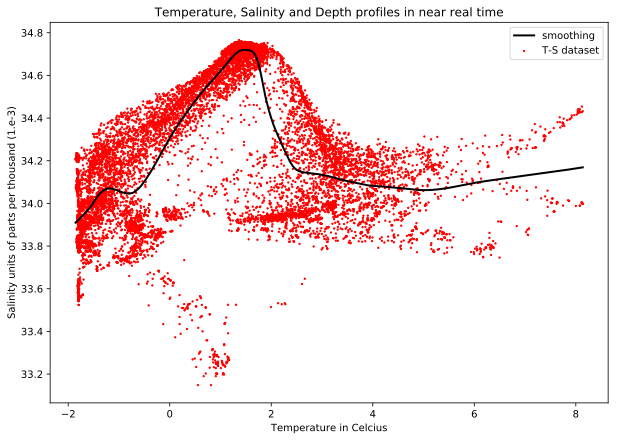

In [24]:
plt.figure(figsize=(10,7))

plt.scatter(temp, sal,  s=2,  marker='o', facecolor='r', lw = 1,label='T-S dataset')
plt.xlabel('Temperature in Celcius')
plt.ylabel('Salinity units of parts per thousand (1.e-3)')
plt.title(title_str)

plt.plot(ys[:,0],ys[:,1],'k',linewidth=2,label='smoothing')

plt.legend(loc=0, fontsize=10)
plt.show()
plt.close()